# Manpower Planning Strategy
## 1. 

# Import Library

In [163]:
import matplotlib.pyplot as plt
import threading
import pandas as pd
import numpy as np

# Data Loading & Preprocessing

## Load employee and task data

In [164]:
new_employee_path = r'C:\Users\Yoga\Documents\Programming Assignments\shinchan\data\fixed_data_employee.csv'
new_task_path = r'C:\Users\Yoga\Documents\Programming Assignments\shinchan\data\fixed_data_task.csv'


## Load output data

In [165]:
global output_obj1
global output_obj2
global output_obj3
global output_moo_df

output_obj1 = r'C:\Users\Yoga\Documents\Programming Assignments\shinchan\output\result_obj1.csv'
output_obj2 = r'C:\Users\Yoga\Documents\Programming Assignments\shinchan\output\result_obj2.csv'
output_obj3 = r'C:\Users\Yoga\Documents\Programming Assignments\shinchan\output\result_obj3.csv'
output_moo = r'C:\Users\Yoga\Documents\Programming Assignments\shinchan\output\result_moo.csv'



output_obj1_df = pd.read_csv(output_obj1, index_col='employee').fillna(0)
output_obj2_df = pd.read_csv(output_obj2, index_col='employee').fillna(0)
output_obj3_df = pd.read_csv(output_obj3, index_col='employee').fillna(0)
output_moo_df = pd.read_csv(output_moo, index_col='employee').fillna(0)

## Data Preprocessing

In [166]:
# Stage 1: Loading & Preprocessing Data
def load_and_preprocess_data(new_employee_path, new_task_path):
    try:
        global employees
        global tasks
        global employee_skills_df
        global task_df
        global task_skills_df
        global story_points
        global company_tasks

        employee_skills_df = pd.read_csv(new_employee_path, index_col='employee_id').fillna(0)
        employee_skills_df.drop(columns=['no', 'Role'], inplace=True, errors='ignore')

        employees = employee_skills_df.index.tolist()
        skills_name = employee_skills_df.columns[1:].tolist()

        task_df = pd.read_csv(new_task_path, index_col='task_id').fillna(0)

        tasks = task_df.index.tolist()
        company_names = list(set(task_df['project_id']))

        story_points = task_df['story_points'].to_dict()

        # convert to dictionary each company and its task
        company_tasks = {}
        for company in company_names:
            company_tasks[company] = task_df[task_df['project_id'] == company].index.tolist()

        # sort the company tasks from C1 to C5
        company_tasks = dict(sorted(company_tasks.items()))

        task_skills_df = task_df.drop(columns=['project_id', 'story_points'])
        task_skills_df.head()

        print("Stage 1: Data Loading & Preprocessing Successful")

    except Exception as e:
        print(f"Stage 1: Data Loading & Preprocessing Failed with error: {str(e)}")
        raise

load_and_preprocess_data(new_employee_path, new_task_path)

Stage 1: Data Loading & Preprocessing Successful


# Print out box plots

In [167]:
def close_plot():
    plt.close()

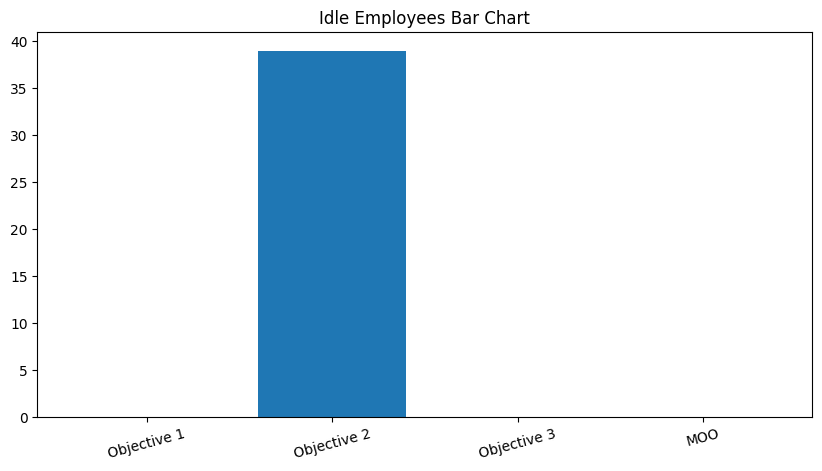

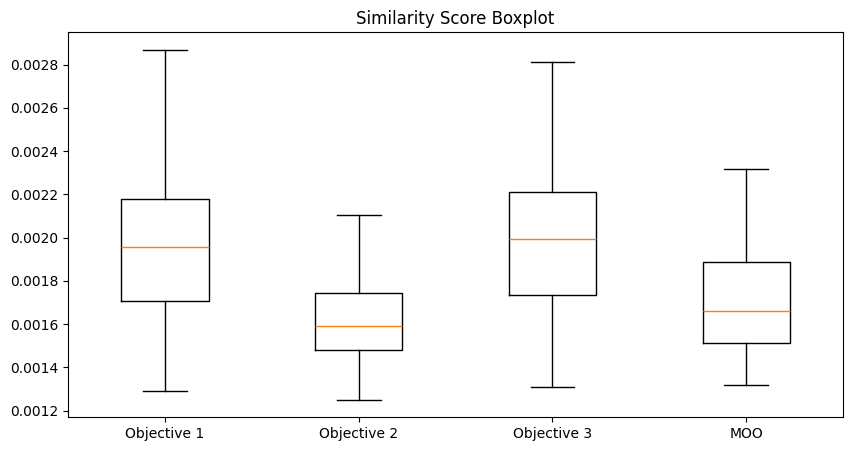

Stage 10: Data Visualization Successful


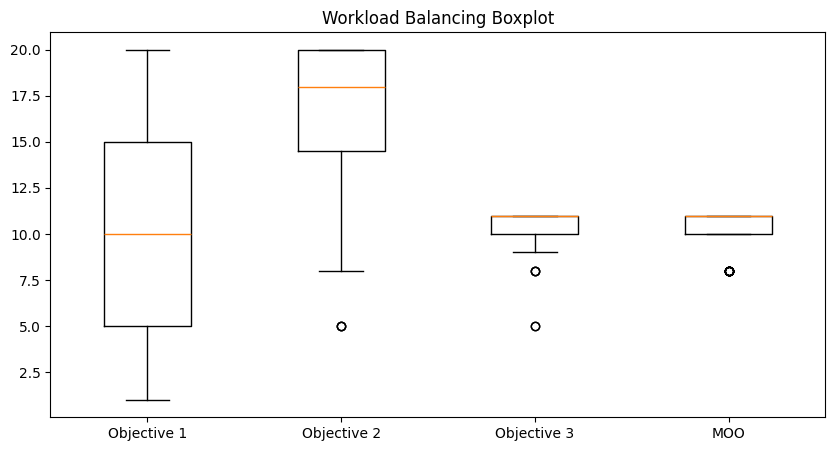

In [168]:
# Stage 10: Data Visualization
def data_visualization():
    try:
        # Normalization function for similarity score
        def normalize_assessment_scores(assessment_scores_df, min_score, max_score, weighted_euclidean=False):
          normalized_scores_df = assessment_scores_df.copy()
          for index, score in enumerate(normalized_scores_df):
            if weighted_euclidean == True:
              normalized_scores_df[index] = 1 - ((score - min_score) / (max_score - min_score))
            else:
              normalized_scores_df[index] = (score - min_score) / (max_score - min_score)

          return normalized_scores_df

        worst_score = 40.311288741492746
        best_score = 0
        total_employee = len(employees)

        total_active_employee_obj1 = len(output_obj1_df[output_obj1_df['sum_sp'] > 0].index)
        total_active_employee_obj2 = len(output_obj2_df[output_obj2_df['sum_sp'] > 0].index)
        total_active_employee_obj3 = len(output_obj3_df[output_obj3_df['sum_sp'] > 0].index)
        total_active_employee_moo = len(output_moo_df[output_moo_df['sum_sp'] > 0].index)

        total_idle_employee_obj1 = total_employee - total_active_employee_obj1
        total_idle_employee_obj2 = total_employee - total_active_employee_obj2
        total_idle_employee_obj3 = total_employee - total_active_employee_obj3
        total_idle_employee_moo = total_employee - total_active_employee_moo

        # timer for auto close plot
        timer = threading.Timer(3, close_plot)
        timer.start()

        # Create bar chart of idle employees
        plt.figure(figsize=(10,5))
        plt.bar(['Objective 1', 'Objective 2', 'Objective 3', 'MOO'],
                [total_idle_employee_obj1, total_idle_employee_obj2, total_idle_employee_obj3, total_idle_employee_moo])
        plt.title('Idle Employees Bar Chart')
        plt.xticks(rotation=15)
        plt.savefig("./output/idle_emp_all.png")
        # plt.show()

        # Convert the strinrepresentations of lists to actual lists
        # Convert the string representations of lists to actual lists if they are strings
        output_obj1_df['similarity_score'] = output_obj1_df['similarity_score'].apply(lambda x: eval(x) if isinstance(x, str) else x)
        output_obj2_df['similarity_score'] = output_obj2_df['similarity_score'].apply(lambda x: eval(x) if isinstance(x, str) else x)
        output_obj3_df['similarity_score'] = output_obj3_df['similarity_score'].apply(lambda x: eval(x) if isinstance(x, str) else x)
        output_moo_df['similarity_score'] = output_moo_df['similarity_score'].apply(lambda x: eval(x) if isinstance(x, str) else x)


        # Explode the 'similarity_score' column to flatten the lists
        similarity_score1 = output_obj1_df['similarity_score'].explode().reset_index(drop=True)
        similarity_score2 = output_obj2_df['similarity_score'].explode().reset_index(drop=True)
        similarity_score3 = output_obj3_df['similarity_score'].explode().reset_index(drop=True)
        similarity_score4 = output_moo_df['similarity_score'].explode().reset_index(drop=True)

        ## normalize values
        similarity_score1 = normalize_assessment_scores(similarity_score1, worst_score, best_score, weighted_euclidean=True)
        similarity_score2 = normalize_assessment_scores(similarity_score2, worst_score, best_score, weighted_euclidean=True)
        similarity_score3 = normalize_assessment_scores(similarity_score3, worst_score, best_score, weighted_euclidean=True)
        similarity_score4 = normalize_assessment_scores(similarity_score4, worst_score, best_score, weighted_euclidean=True)


        # timer for auto close plot
        timer = threading.Timer(3, close_plot)
        timer.start()

        plt.figure(figsize=(10, 5))
        plt.boxplot([similarity_score1, similarity_score2, similarity_score3, similarity_score4],
                    labels=['Objective 1', 'Objective 2', 'Objective 3', 'MOO']) 
        plt.title('Similarity Score Boxplot')
        plt.savefig("./output/similarity_all.png")
        plt.show()


        workload_1 = output_obj1_df['sum_sp'].explode().reset_index(drop=True)
        workload_2 = output_obj2_df['sum_sp'].explode().reset_index(drop=True)
        workload_3 = output_obj3_df['sum_sp'].explode().reset_index(drop=True)
        workload_moo = output_moo_df['sum_sp'].explode().reset_index(drop=True)


        # timer for auto close plot
        timer = threading.Timer(3, close_plot)
        timer.start()

        plt.figure(figsize=(10, 5))
        plt.boxplot([workload_1, workload_2, workload_3, workload_moo],
                    labels=['Objective 1', 'Objective 2', 'Objective 3', 'MOO'])
        plt.title('Workload Balancing Boxplot')
        plt.savefig("./output/workload_all.png")
        # plt.show()

        print("Stage 10: Data Visualization Successful")
    except Excep as e:
        print(f"Stage 10: Data Visualization Failed with error: {str(e)}")
        onraise

data_visualization()

# Wisnu punya

In [169]:
import re

def string_to_list(str):
    task_list = re.findall(r"'(T\d+)'", str)
    return task_list

output_moo_df = pd.read_csv(output_moo, index_col='employee').fillna(0)
# list1 = string_to_list(output_moo_df.loc['Talent 1', 'assigned_task'])

In [170]:
def compare_lists(list_of_lists):
    # Check if the input is not empty and all lists are of the same length
    if not list_of_lists or any(len(lst) != len(list_of_lists[0]) for lst in list_of_lists):
        raise ValueError("All lists must be non-empty and of the same length")

    # Transpose the list of lists to iterate through each index
    transposed_lists = zip(*list_of_lists)

    # Create the result list based on the comparison
    result = [1 if sum(items) > 0 else 0 for items in transposed_lists]

    return result

In [171]:
import pandas as pd

output_moo_df = pd.read_csv(output_moo, index_col='employee').fillna(0)
output_moo_df.drop(columns=['company','sum_sp', 'wasted_sp', 'similarity_score',], inplace=True, errors='ignore')

# get list of employees to iterate
employees = output_moo_df.index

# create function that can return the skill metrics for emp
employee_skills_df = pd.read_csv(new_employee_path, index_col='employee_id').fillna(0)
employee_skills_df.drop(columns=['employee_id','No', 'Role'], inplace=True, errors='ignore')
# employee_skills_df.loc['Talent 1']

# create function that can return the skill metrics for task
task_df =  pd.read_csv(new_task_path, index_col='task_id').fillna(0)
task_df.drop(columns=['task_id','No', 'project_id', 'story_points',], inplace=True, errors='ignore')
# task_df.loc['T55']

binary_gap_dict = {}
real_gap_dict = {}
# iterate for every talent and task
for employee in employees:
    tasks = string_to_list(output_moo_df['assigned_task'].loc[employee])
    emp_skill = employee_skills_df.loc[employee]
    full_binary_gap = []
    for task in tasks:
        binary_gap = []
        real_gap = []
        task_skill = task_df.loc[task]
        for criteria_index in range(len(emp_skill)):
            if emp_skill[criteria_index] < task_skill[criteria_index]:
                binary_gap.append(1)
            elif emp_skill[criteria_index] >= task_skill[criteria_index]:
                binary_gap.append(0)
            real_gap.append(task_skill[criteria_index] - emp_skill[criteria_index])
        pair = f'({employee_skills_df.loc[employee]}, {task_df.loc[task]})'
        full_binary_gap.append(binary_gap)
        real_gap_dict[pair] = binary_gap
    
    # process the final binary gap
    binary_gap_dict[employee] = compare_lists(full_binary_gap)

C:\Users\Yoga\AppData\Local\Temp\ipykernel_25936\2546210204.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if emp_skill[criteria_index] < task_skill[criteria_index]:
C:\Users\Yoga\AppData\Local\Temp\ipykernel_25936\2546210204.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  real_gap.append(task_skill[criteria_index] - emp_skill[criteria_index])
C:\Users\Yoga\AppData\Local\Temp\ipykernel_25936\2546210204.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

In [172]:
headers_df = pd.DataFrame(employee_skills_df.columns, columns=['Skill Names'])


binary_gap_df = pd.DataFrame(binary_gap_dict)
transposed_df = binary_gap_df.T
transposed_df.columns = headers_df.values
transposed_df.index.name = 'employee'
final_df = transposed_df.reset_index()
final_df

,employee,"(Mathematics.Linear Algebra,)","(Mathematics.Differential Equations,)","(Mathematics.Optimization Technique,)","(Mathematics.Calculus,)","(Mathematics.Combinatorics & Graph,)","(Statistics & Probabilities.Statistics,)","(Statistics & Probabilities.Probability & Sampling,)","(Statistics & Probabilities.Bayessian Method,)","(Statistics & Probabilities.Hypothesis Testing,)",...,"(Data & Cloud Engineering.Data Security & Privacy,)","(Data & Cloud Engineering.Distributed Systems,)","(Data & Cloud Engineering.Monitoring, Logging, Alerting,)","(MLOPS.ML Lifecycle,)","(MLOPS.ML Model Pipeline,)","(MLOPS.Model Versioning,)","(MLOPS.Automated Testing & Validation,)","(MLOPS.Scalable Model Training,)","(MLOPS.Model Deployment, Monitoring, Logging,)","(MLOPS.Ethical AI & Bias Mitigation,)"
0,Talent 1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Talent 2,0,0,1,0,1,0,0,1,0,...,0,1,1,1,1,1,1,1,1,1
2,Talent 3,1,1,0,1,1,0,1,1,1,...,1,0,0,0,0,0,1,1,1,0
3,Talent 4,0,1,0,1,1,0,1,1,0,...,0,1,1,1,0,1,1,0,1,0
4,Talent 5,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Talent 107,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105,Talent 108,0,1,1,0,1,0,1,1,1,...,0,1,0,1,1,0,1,1,0,1
106,Talent 109,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
107,Talent 110,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [173]:
skill_sums = final_df.drop(columns=['employee']).sum()
summed_df = pd.DataFrame(skill_sums, columns=['Sum']).T
summed_df

,"(Mathematics.Linear Algebra,)","(Mathematics.Differential Equations,)","(Mathematics.Optimization Technique,)","(Mathematics.Calculus,)","(Mathematics.Combinatorics & Graph,)","(Statistics & Probabilities.Statistics,)","(Statistics & Probabilities.Probability & Sampling,)","(Statistics & Probabilities.Bayessian Method,)","(Statistics & Probabilities.Hypothesis Testing,)","(Statistics & Probabilities.A/B Testing,)",...,"(Data & Cloud Engineering.Data Security & Privacy,)","(Data & Cloud Engineering.Distributed Systems,)","(Data & Cloud Engineering.Monitoring, Logging, Alerting,)","(MLOPS.ML Lifecycle,)","(MLOPS.ML Model Pipeline,)","(MLOPS.Model Versioning,)","(MLOPS.Automated Testing & Validation,)","(MLOPS.Scalable Model Training,)","(MLOPS.Model Deployment, Monitoring, Logging,)","(MLOPS.Ethical AI & Bias Mitigation,)"
Sum,54,57,64,63,65,51,61,65,65,62,...,72,74,70,73,73,68,70,87,77,79


# EDA

In [182]:

# Sort the DataFrame in descending order to see the skills with the highest sum first
sorted_summed_df = summed_df.sort_values(by='Sum', ascending=False)

# Extract the skill names into a list
sorted_skill_list = sorted_summed_df.index.tolist()

# Show the sorted list
print(sorted_skill_list)

KeyError: 'Sum'

In [174]:
output_moo_df = pd.read_csv(output_moo, index_col='employee').fillna(0)

In [175]:
output_moo_df['similarity_score'] = output_moo_df['similarity_score'].apply(lambda x: eval(x) if isinstance(x, str) else x)
output_moo_df['assigned_task'] = output_moo_df['assigned_task'].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [176]:
similarity_score = output_moo_df['similarity_score'].explode().reset_index(drop=True)
task = output_moo_df['assigned_task'].explode().reset_index(drop=True)

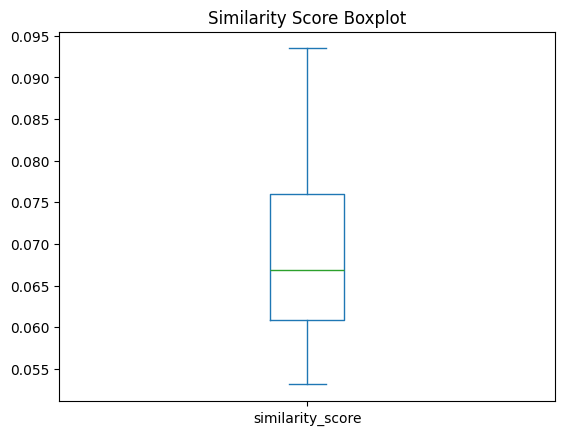

In [177]:
similarity_score.plot(kind='box')
plt.title('Similarity Score Boxplot')
plt.show()

In [178]:
# Create a DataFrame to associate each similarity score with its respective talent
similarity_score_per_task = pd.DataFrame({'task': task, 'similarity_score': similarity_score})

# Show the DataFrame
print(similarity_score_per_task)

     task similarity_score
0     T55         0.068775
1     T66         0.056775
2    T121         0.064409
3    T122         0.062727
4    T269           0.0625
..    ...              ...
295    T4         0.057874
296  T129         0.060051
297  T174         0.062284
298  T222         0.061197
299  T273         0.068544

[300 rows x 2 columns]


In [179]:
# Calculate quartiles
Q1 = np.quantile(similarity_score_per_task['similarity_score'], 0.25)
Q3 = np.quantile(similarity_score_per_task['similarity_score'], 0.75)
IQR = Q3 - Q1

# Count the number of similarity scores within each quartile range
employees_in_Q1 = similarity_score_per_task[similarity_score_per_task['similarity_score'] <= Q1]
employees_in_IQR = similarity_score_per_task[(similarity_score_per_task['similarity_score'] >= float(Q1)) & (similarity_score_per_task['similarity_score'] <= float(Q3))]
employees_in_Q3 = similarity_score_per_task[similarity_score_per_task['similarity_score'] >= Q3]

employees_in_Q3

,task,similarity_score
8,T71,0.078977
10,T73,0.076242
22,T297,0.089881
23,T50,0.078853
24,T110,0.087459
...,...,...
290,T149,0.079192
291,T251,0.080088
292,T9,0.081152
293,T140,0.081269


In [180]:
# Initialize a dictionary to store the aggregated gaps for each employee
employee_gaps = {}

# Iterate over each employee
for employee, tasks in employee_assignments.items():
    # Get the skills of the employee
    employee_skills = employee_skills_df.loc[employee]
    
    # Initialize an array to store the aggregated gap
    aggregated_gap = [0] * len(employee_skills)
    
    # Iterate over the assigned tasks for the employee
    for task in tasks:
        # Get the competency requirements for the task
        task_requirements = task_skills_df.loc[task]
        
        # Calculate the gap for the task
        task_gap = [1 if task_requirements[i] > employee_skills[i] else 0 for i in range(len(employee_skills))]
        
        # Aggregate the gap
        aggregated_gap = [max(aggregated_gap[i], task_gap[i]) for i in range(len(task_gap))]
    
    # Store the aggregated gap for the employee
    employee_gaps[employee] = aggregated_gap

# Print the final gaps for each employee
for employee, gap in employee_gaps.items():
    print(f"{employee}_gap = {gap}")

NameError: name 'employee_assignments' is not defined

In [ ]:
import re

def string_to_list(str):
    task_list = re.findall(r"'(T\d+)'", str)
    return task_list

# output_moo_df = pd.read_csv(output_moo, index_col='employee').fillna(0)
# list1 = string_to_list(output_moo_df.loc['Talent 1', 'assigned_task'])

In [ ]:
import pandas as pd

output_moo_df = pd.read_csv(output_moo, index_col='employee').fillna(0)
output_moo_df.drop(columns=['company','sum_sp', 'wasted_sp', 'similarity_score',], inplace=True, errors='ignore')

# get list of employees to iterate
employees = output_moo_df.index

# create function that can return the skill metrics for emp
employee_skills_df = pd.read_csv(new_employee_path, index_col='employee_id').fillna(0)
employee_skills_df.drop(columns=['employee_id','No', 'Role'], inplace=True, errors='ignore')
# employee_skills_df.loc['Talent 1']

# create function that can return the skill metrics for task
task_df =  pd.read_csv(new_task_path, index_col='task_id').fillna(0)
task_df.drop(columns=['task_id','No', 'project_id', 'story_points',], inplace=True, errors='ignore')
# task_df.loc['T55']

binary_gap_dict = {}
real_gap_dict = {}
# iterate for every talent and task
for employee in employees:
    tasks = string_to_list(output_moo_df['assigned_task'].loc[employee])
    emp_skill = employee_skills_df.loc[employee]
    full_binary_gap = []
    for task in tasks:
        # binary_gap = []
        # real_gap = []
        # task_skill = task_df.loc[task]
        # for criteria_index in range(len(emp_skill)):
        #     if emp_skill[criteria_index] < task_skill[criteria_index]:
        #         binary_gap.append(1)
        #     elif emp_skill[criteria_index] >= task_skill[criteria_index]:
        #         binary_gap.append(0)
        #     real_gap.append(task_skill[criteria] - emp_skill[criteria])
        # pair = f'({employee_skills_df.loc[employee]}, {task_df.loc[task]})'
        # real_gap_dict[pair] = binary_gap

        binary_gap = []
        real_gap = []
        task_skill = task_df.loc[task]
        for criteria_index in range(len(emp_skill)):
            if emp_skill[criteria_index] < task_skill[criteria_index]:
                binary_gap.append(1)
            elif emp_skill[criteria_index] >= task_skill[criteria_index]:
                binary_gap.append(0)
            real_gap.append(task_skill[criteria] - emp_skill[criteria])
        pair = f'({employee_skills_df.loc[employee]}, {task_df.loc[task]})'
        full_binary_gap.append(binary_gap)
        real_gap_dict[pair] = binary_gap
    
    # process the final binary gap
    binary_gap_dict[employee] = compare_lists(full_binary_gap)

C:\Users\Yoga\AppData\Local\Temp\ipykernel_25936\1103191366.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if emp_skill[criteria_index] < task_skill[criteria_index]:
C:\Users\Yoga\AppData\Local\Temp\ipykernel_25936\1103191366.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  real_gap.append(task_skill[criteria] - emp_skill[criteria])
C:\Users\Yoga\AppData\Local\Temp\ipykernel_25936\1103191366.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

In [ ]:
headers_df = pd.DataFrame(employee_skills_df.columns, columns=['Skill Names'])
headers_df.values

array([['Mathematics.Linear Algebra'],
       ['Mathematics.Differential Equations'],
       ['Mathematics.Optimization Technique'],
       ['Mathematics.Calculus'],
       ['Mathematics.Combinatorics & Graph'],
       ['Statistics & Probabilities.Statistics'],
       ['Statistics & Probabilities.Probability & Sampling'],
       ['Statistics & Probabilities.Bayessian Method'],
       ['Statistics & Probabilities.Hypothesis Testing'],
       ['Statistics & Probabilities.A/B Testing'],
       ['Statistics & Probabilities.CUPED'],
       ['Data Structures & Algorithms.Complexity Analysis'],
       ['Data Structures & Algorithms.Programming'],
       ['Data Structures & Algorithms.Data Structures'],
       ['Data Structures & Algorithms.Algorithms'],
       ['Data Structures & Algorithms.Advanced Algorithms'],
       ['Data Structures & Algorithms.SQL'],
       ['Data Structures & Algorithms.Shell / Bash Scripting'],
       ['Econometrics, Data Analysis, and Data Visualization.Data Preproc

In [ ]:
headers_df = pd.DataFrame(employee_skills_df.columns, columns=['Skill Names'])


binary_gap_df = pd.DataFrame(binary_gap_dict)
transposed_df = binary_gap_df.T
transposed_df.columns = headers_df.values
transposed_df.index.name = 'employee'
final_df = transposed_df.reset_index()
final_df

,employee,"(Mathematics.Linear Algebra,)","(Mathematics.Differential Equations,)","(Mathematics.Optimization Technique,)","(Mathematics.Calculus,)","(Mathematics.Combinatorics & Graph,)","(Statistics & Probabilities.Statistics,)","(Statistics & Probabilities.Probability & Sampling,)","(Statistics & Probabilities.Bayessian Method,)","(Statistics & Probabilities.Hypothesis Testing,)",...,"(Data & Cloud Engineering.Data Security & Privacy,)","(Data & Cloud Engineering.Distributed Systems,)","(Data & Cloud Engineering.Monitoring, Logging, Alerting,)","(MLOPS.ML Lifecycle,)","(MLOPS.ML Model Pipeline,)","(MLOPS.Model Versioning,)","(MLOPS.Automated Testing & Validation,)","(MLOPS.Scalable Model Training,)","(MLOPS.Model Deployment, Monitoring, Logging,)","(MLOPS.Ethical AI & Bias Mitigation,)"
0,Talent 1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
1,Talent 2,0,0,1,0,1,0,0,1,0,...,0,1,1,1,1,1,1,1,1,1
2,Talent 3,1,1,0,1,1,0,1,1,1,...,1,0,0,0,0,0,1,1,1,0
3,Talent 4,0,1,0,1,1,0,1,1,0,...,0,1,1,1,0,1,1,0,1,0
4,Talent 5,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Talent 107,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105,Talent 108,0,1,1,0,1,0,1,1,1,...,0,1,0,1,1,0,1,1,0,1
106,Talent 109,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
107,Talent 110,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
skill_sums = final_df.drop(columns=['employee']).sum()
summed_df = pd.DataFrame(skill_sums, columns=['Sum']).T

skill_sums

,"(Mathematics.Linear Algebra,)","(Mathematics.Differential Equations,)","(Mathematics.Optimization Technique,)","(Mathematics.Calculus,)","(Mathematics.Combinatorics & Graph,)","(Statistics & Probabilities.Statistics,)","(Statistics & Probabilities.Probability & Sampling,)","(Statistics & Probabilities.Bayessian Method,)","(Statistics & Probabilities.Hypothesis Testing,)","(Statistics & Probabilities.A/B Testing,)",...,"(Data & Cloud Engineering.Data Security & Privacy,)","(Data & Cloud Engineering.Distributed Systems,)","(Data & Cloud Engineering.Monitoring, Logging, Alerting,)","(MLOPS.ML Lifecycle,)","(MLOPS.ML Model Pipeline,)","(MLOPS.Model Versioning,)","(MLOPS.Automated Testing & Validation,)","(MLOPS.Scalable Model Training,)","(MLOPS.Model Deployment, Monitoring, Logging,)","(MLOPS.Ethical AI & Bias Mitigation,)"
Sum,54,57,64,63,65,51,61,65,65,62,...,72,74,70,73,73,68,70,87,77,79
